##Librerias

En esta sección cargamos las librerías necesarias para el análisis exploratorio y visualización.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from scipy.stats import gaussian_kde


##dataset

Montamos Google Drive y cargamos el dataset del banco que contiene la información de la campaña de marketing.

Si la carpeta del proyecto no se encuentra en google drive, se recomienda subir el archivo de datos en el google colab, o escribir la ruta del archivo en el que se encuentre si se emplea otro entorno de ejecución del código.


In [ ]:
drive.mount('/content/gdrive')
csv_path = '/content/gdrive/MyDrive/Consultoría. Laboratorio/data/bank-additional-full.csv' # comentar el que no se use
#csv_path = '/content/bank-additional-full.csv' # comentar el que no se use
data = pd.read_csv(csv_path, sep=";")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Análisis exploratorio de los datos

Exploramos la estructura del dataset: cantidad de observaciones, variables y tipo de datos.


In [ ]:
columnas = data.columns
estructura = data.shape
print("La cantidad de observaciones es: ", estructura[0])
print("La cantidad de variables es: ", estructura[1])
print("Estas variables son: ", columnas)

La cantidad de observaciones es:  41188
La cantidad de variables es:  21
Estas variables son:  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
data.dtypes.to_frame()

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


*  (int) **Age**: Edad del cliente.
*  (Category) **Job**: Tipo de trabajo.
*  (Category) **Marital**: estado civil.
*  (Category) **Education**: Nivel de educación del cliente.
*  (Category) **Default**: Si tiene crédito en mora. Si no realizó pagos de deudas que poseía.
*  (Category) **Housing**: Si tiene préstamo de vivienda.
*  (Category) **Loan**: Si tiene préstamo personal.
*  (Category) **Contact**: Tipo de comunicación de contacto.
*  (Category) **Month**: último día de contacto del mes.
*  (Category) **Day of the week**: Último mes de contacto del año.
*  (int)      **Duration**: Duración del último contacto, en segundos.
*  (int)      **Campaign**: Número de contactos realizados durante esta campaña y para este cliente.
*  (int)      **Pdays**: Número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior.
*  (int)      **Previous**: Número de contactos realizados antes de esta campaña y para este cliente.
*  (Category) **Poutcome**: Resultado de la campaña de marketing anterior.
*  (float)   **emp.var.rate**: .
*  (float)    **cons.price.idx**: .
*  (float)    **cons.conf.idx**: .
*  (float)    **euribor3m**: .
*  (float)    **nr.employed**: .
*  (Category) **Y**: El cliente ha suscrito un depósito a plazo o no.      



In [ ]:
data.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37349,41,admin.,single,university.degree,no,yes,no,cellular,aug,tue,...,2,999,0,nonexistent,-2.9,92.201,-31.4,0.883,5076.2,no
30649,25,services,married,high.school,no,no,no,cellular,may,tue,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
28071,30,technician,married,university.degree,no,yes,no,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
1267,36,admin.,divorced,university.degree,no,no,no,telephone,may,thu,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
30271,27,admin.,single,high.school,no,yes,no,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no


---

# Distribución de las variables de la clase yes de la variable objetivo

Visualizamos histogramas, estadísticos y boxplots para comprender el comportamiento de los clientes que se suscribieron.


In [ ]:
data_yes = data[data['y'] == 'yes']

# Mostrar cuántas filas quedaron
print(f"Filas con y == 'yes': {data_yes.shape[0]}")
data_yes.head()

Filas con y == 'yes': 4108


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,is_outlier,contactosTotales,campañasExitosasPrevias
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,True,1,0
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,True,1,0
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,True,1,0
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,False,1,0
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,False,1,0


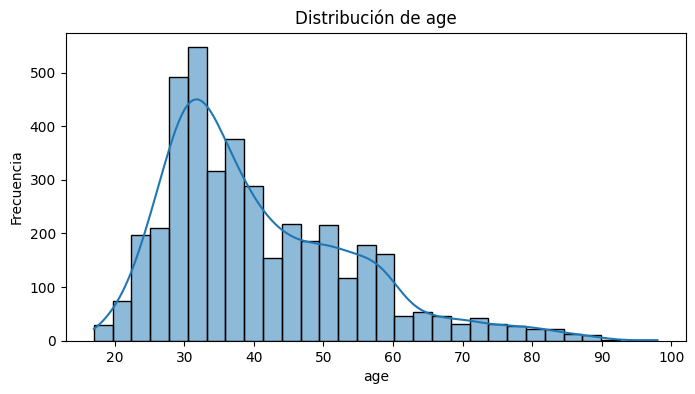

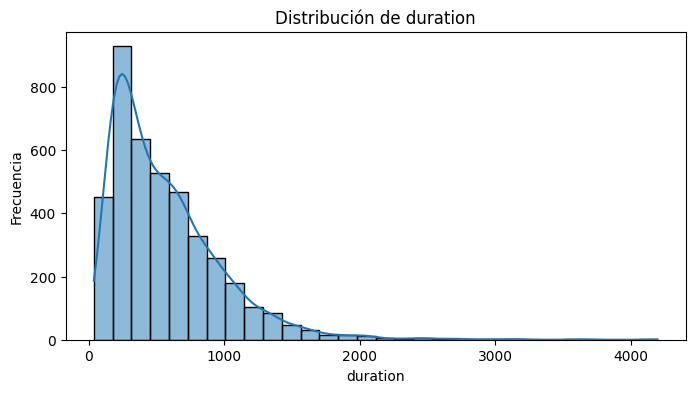

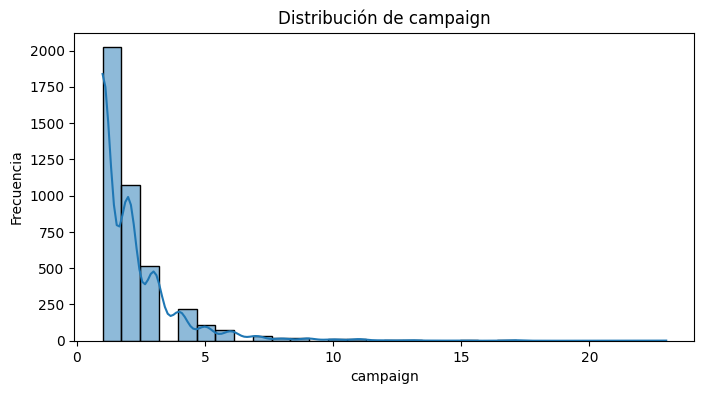

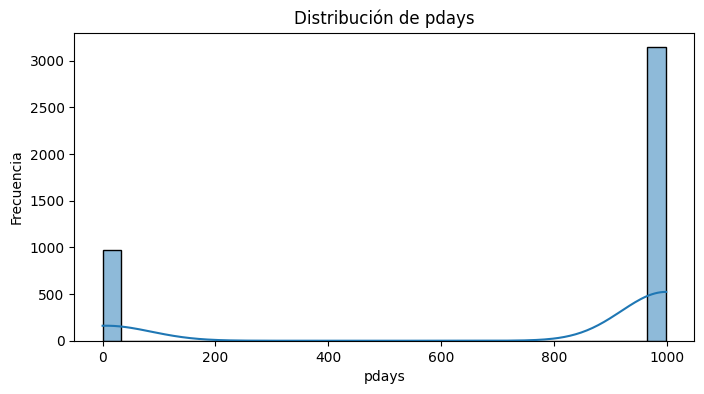

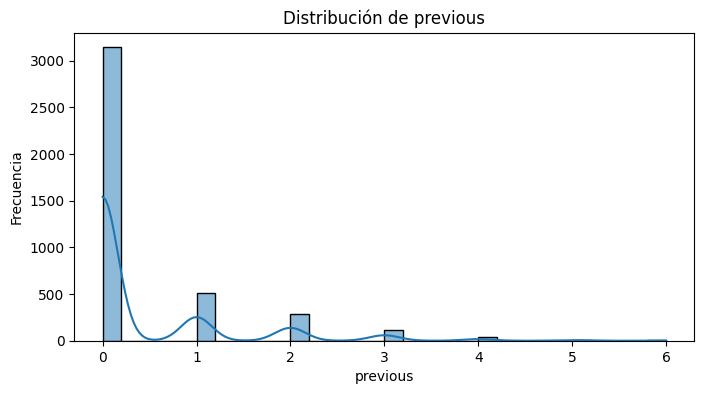

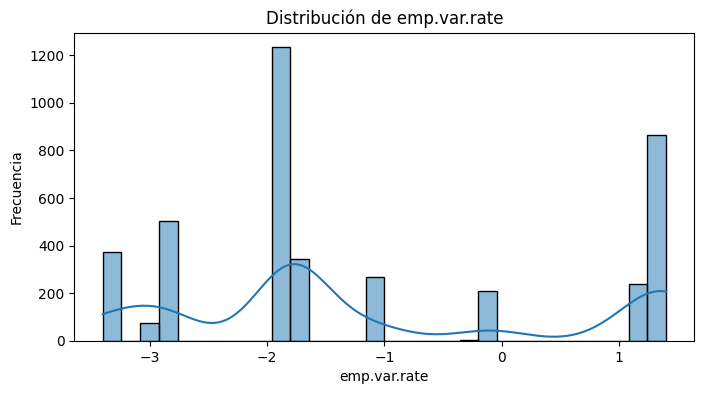

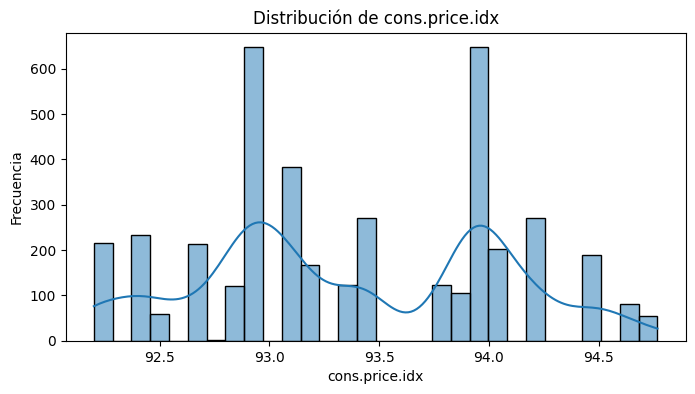

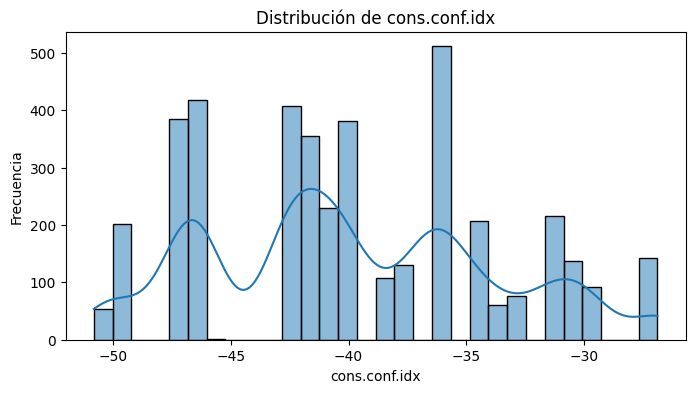

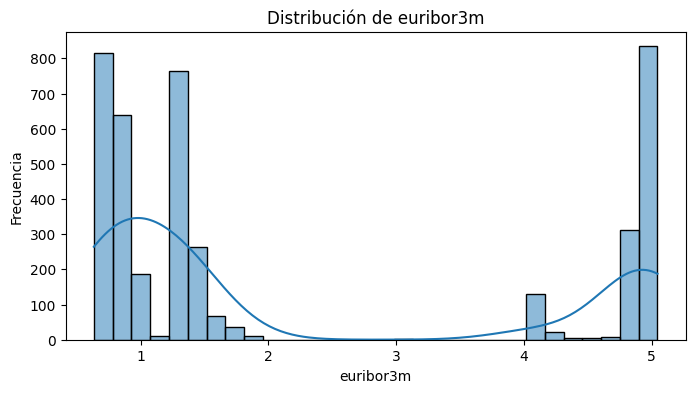

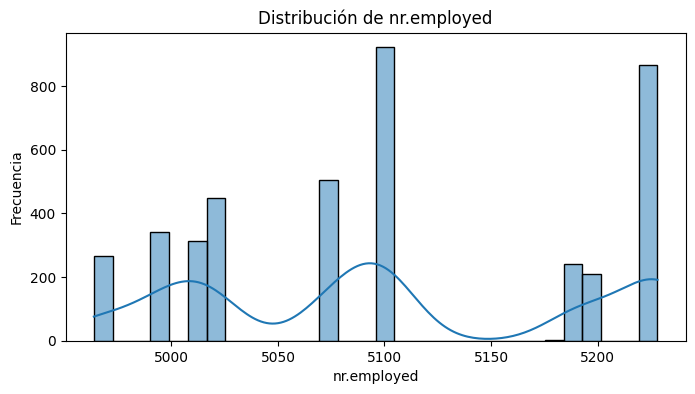

In [ ]:
numeric_vars = ['age', 'duration', 'campaign', 'pdays', 'previous',
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for var in numeric_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_yes[var], kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()


In [ ]:
# Descripción básica
data_yes[numeric_vars].describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
age,4108.0,40.76,13.69,17.00,31.00,37.00,49.00,98.00
duration,4108.0,563.35,408.06,37.00,256.00,462.00,758.00,4199.00
campaign,4108.0,2.07,1.71,1.00,1.00,2.00,2.00,23.00
pdays,4108.0,765.23,421.37,0.00,999.00,999.00,999.00,999.00
previous,4108.0,0.40,0.86,0.00,0.00,0.00,0.00,6.00
emp.var.rate,4108.0,-1.12,1.66,-3.40,-1.80,-1.80,1.10,1.40
cons.price.idx,4108.0,93.39,0.67,92.20,92.89,93.37,93.99,94.77
cons.conf.idx,4108.0,-39.86,6.02,-50.80,-46.20,-40.40,-36.10,-26.90
euribor3m,4108.0,2.25,1.80,0.63,0.87,1.28,4.86,5.04
nr.employed,4108.0,5100.41,89.55,4963.60,5017.50,5099.10,5195.80,5228.10


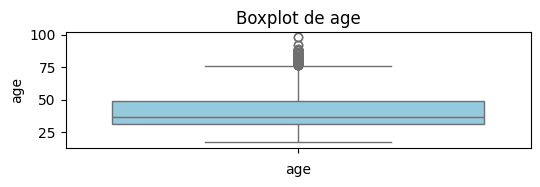

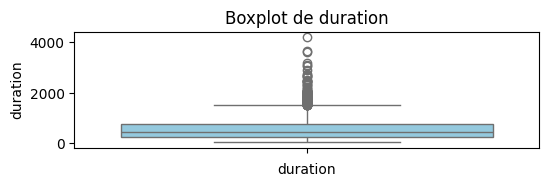

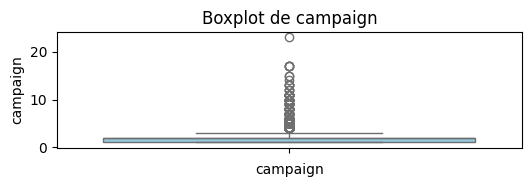

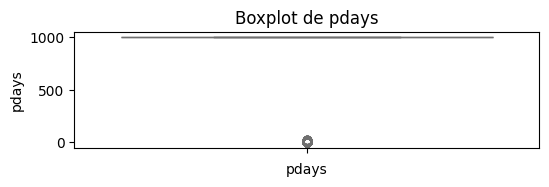

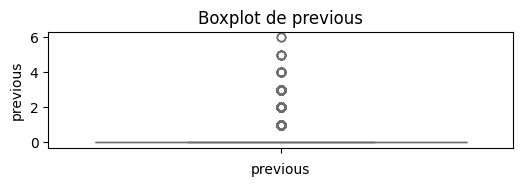

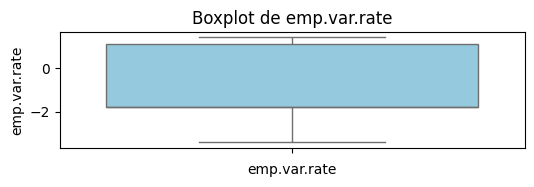

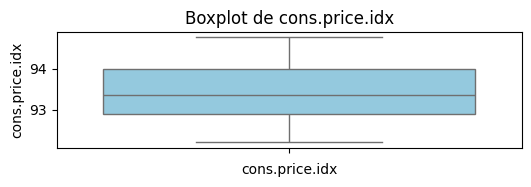

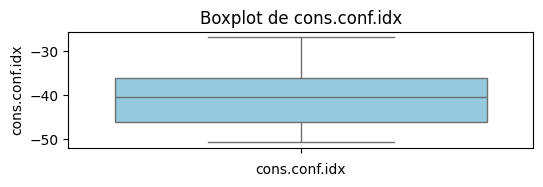

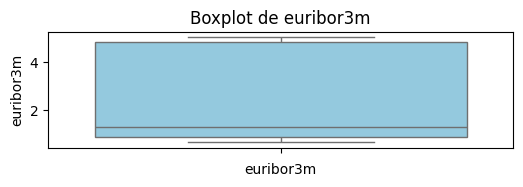

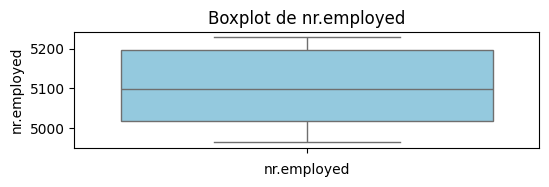

In [ ]:
for var in numeric_vars:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data_yes[var], color='skyblue')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.show()


## Correlación entre variables numéricas y la clase objetivo

Calculamos la correlación entre variables numéricas y la variable binaria objetivo para identificar qué variables influyen más en la probabilidad de suscripción.


duration          0.408684
previous          0.312601
cons.conf.idx     0.030100
age               0.024855
campaign         -0.068615
cons.price.idx   -0.155835
emp.var.rate     -0.325775
euribor3m        -0.338771
pdays            -0.346907
nr.employed      -0.381148
Name: y_bin, dtype: float64


<ipython-input-93-5464e02f2d64>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


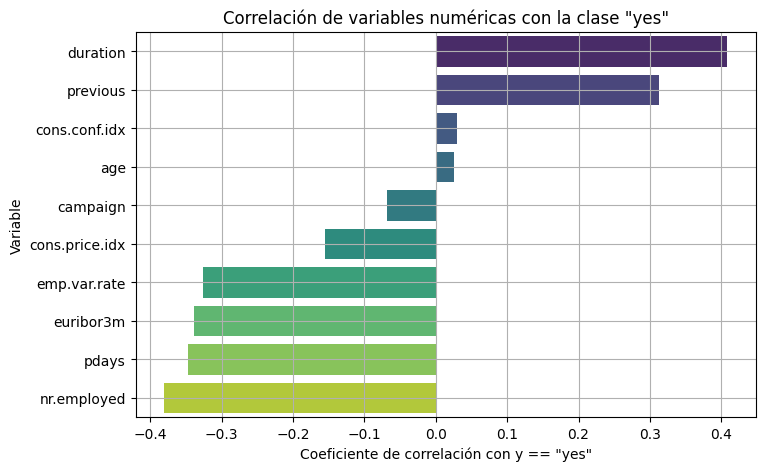

In [ ]:
data_corr = data.copy()
data_corr['y_bin'] = data_corr['y'].apply(lambda x: 1 if x == 'yes' else 0)
correlations = data_corr[numeric_vars + ['y_bin']].corr()['y_bin'].drop('y_bin').sort_values(ascending=False)
print(correlations)
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlación de variables numéricas con la clase "yes"')
plt.xlabel('Coeficiente de correlación con y == "yes"')
plt.ylabel('Variable')
plt.grid(True)
plt.show()

## Análisis de variables categóricas para clientes que se suscribieron

Para cada variable categórica mostramos la distribución y boxplots para comprender su efecto en la probabilidad de suscripción.


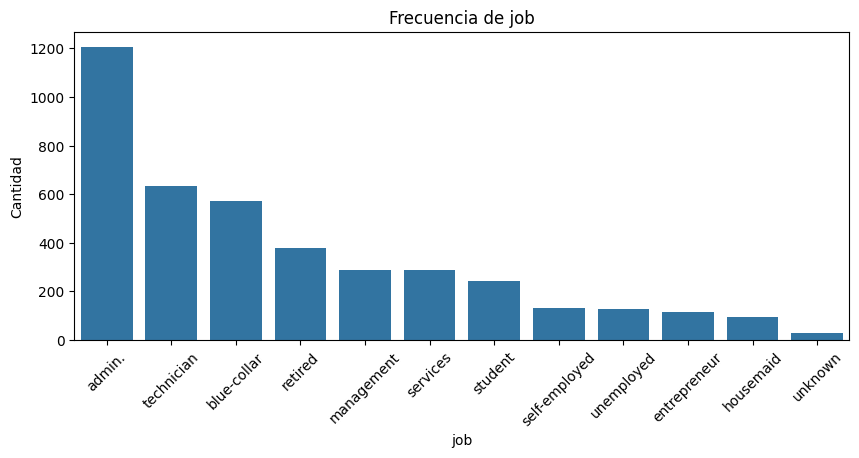

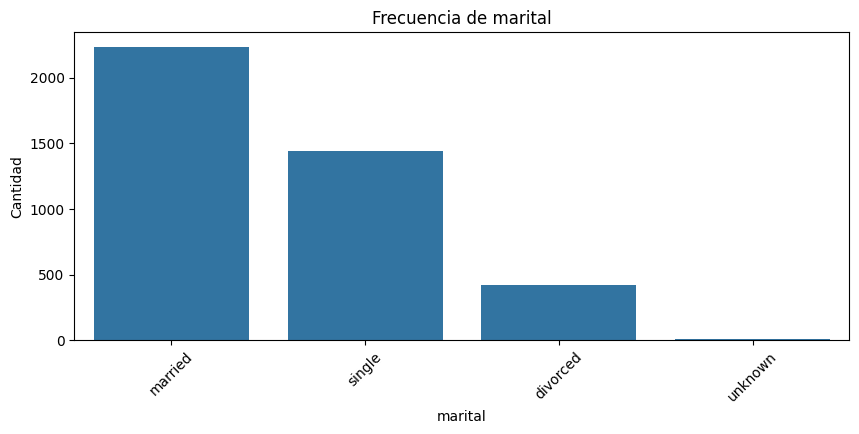

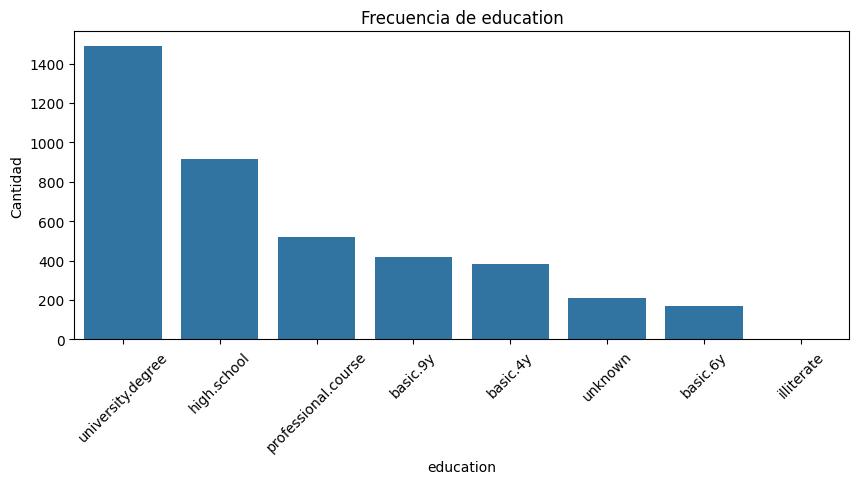

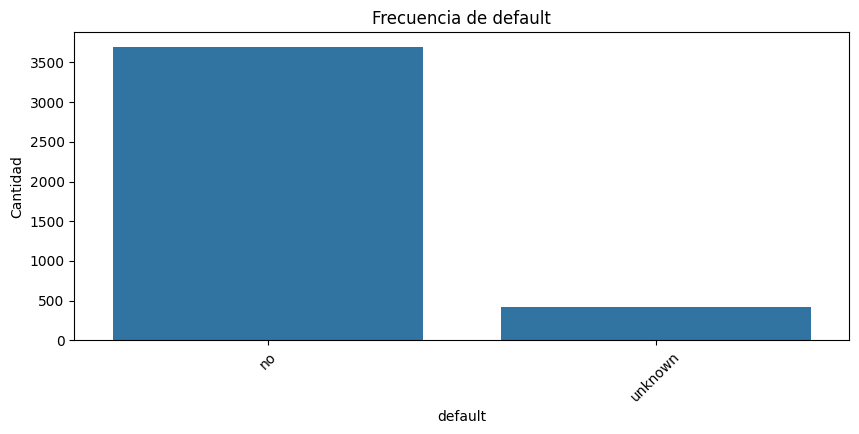

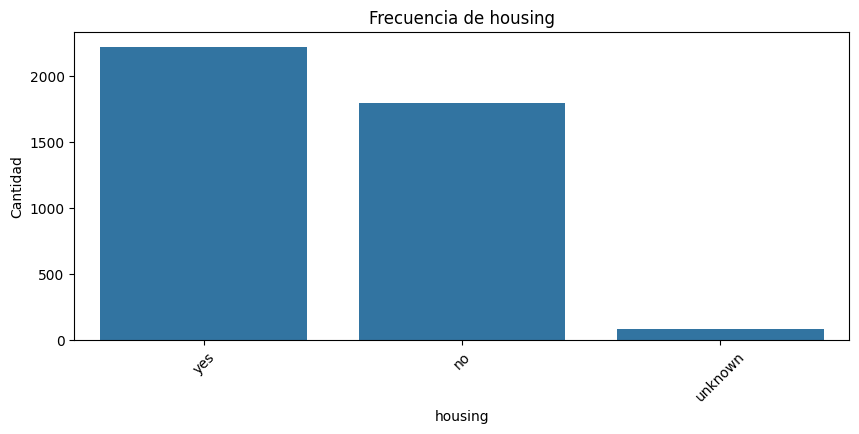

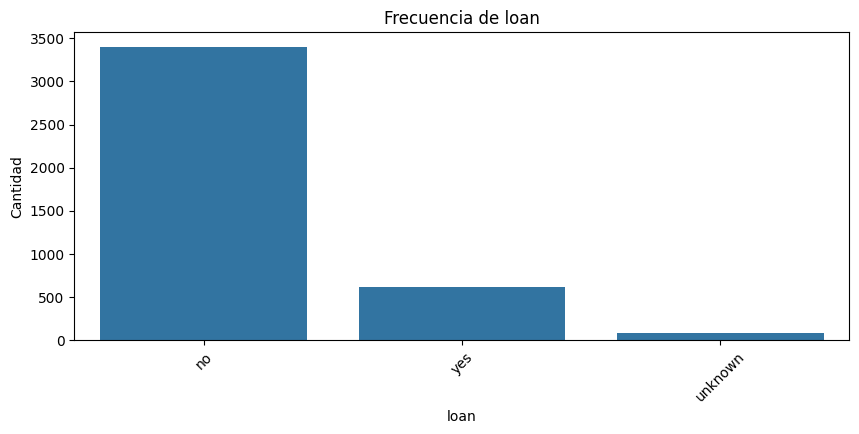

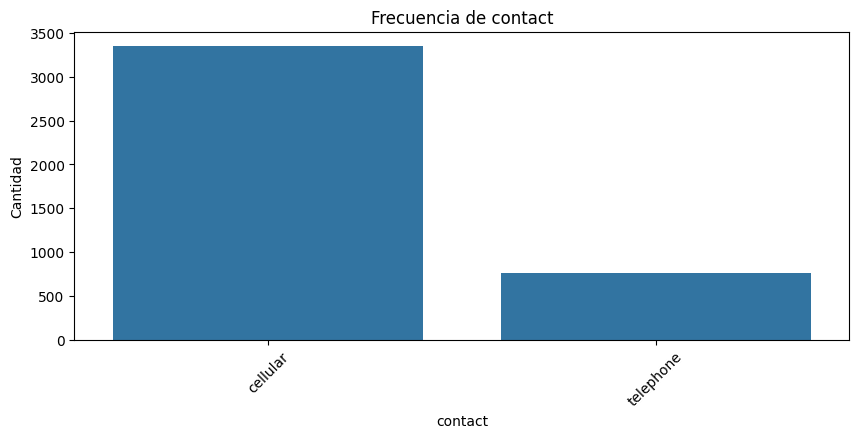

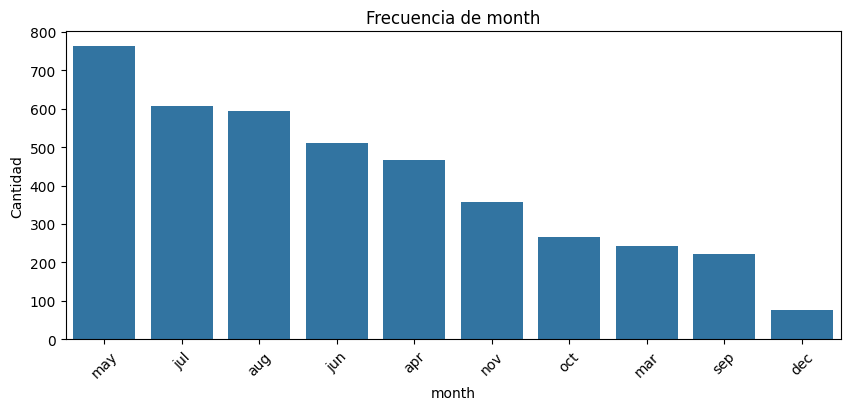

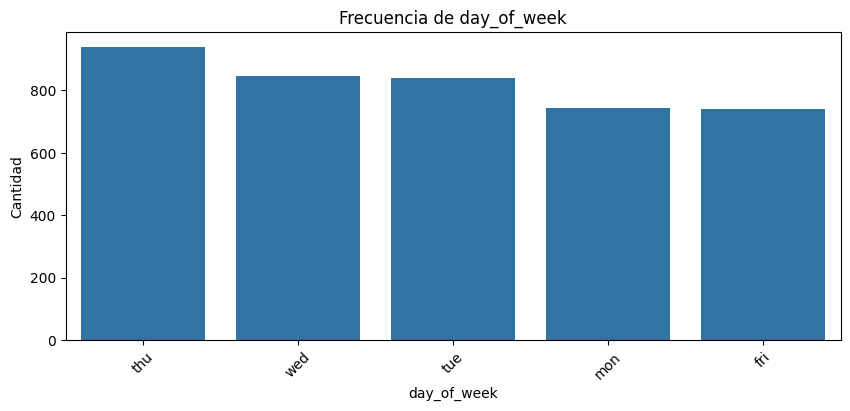

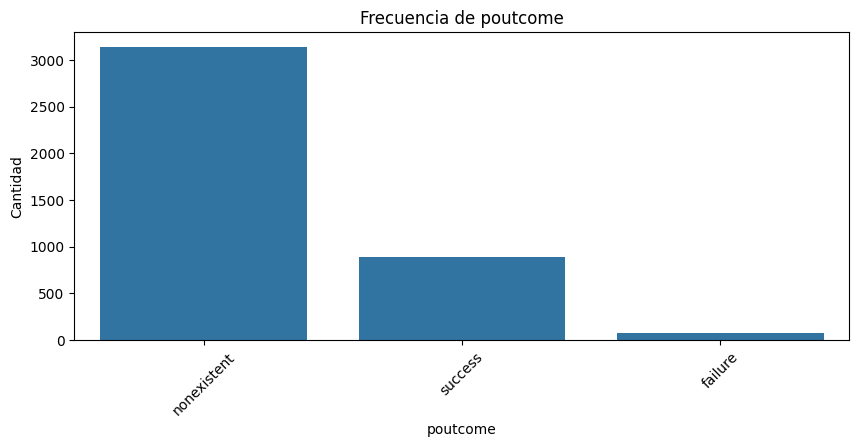

In [ ]:
categorical_vars = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data_yes, x=var, order=data_yes[var].value_counts().index)
    plt.title(f'Frecuencia de {var}')
    plt.xticks(rotation=45)
    plt.ylabel('Cantidad')
    plt.show()


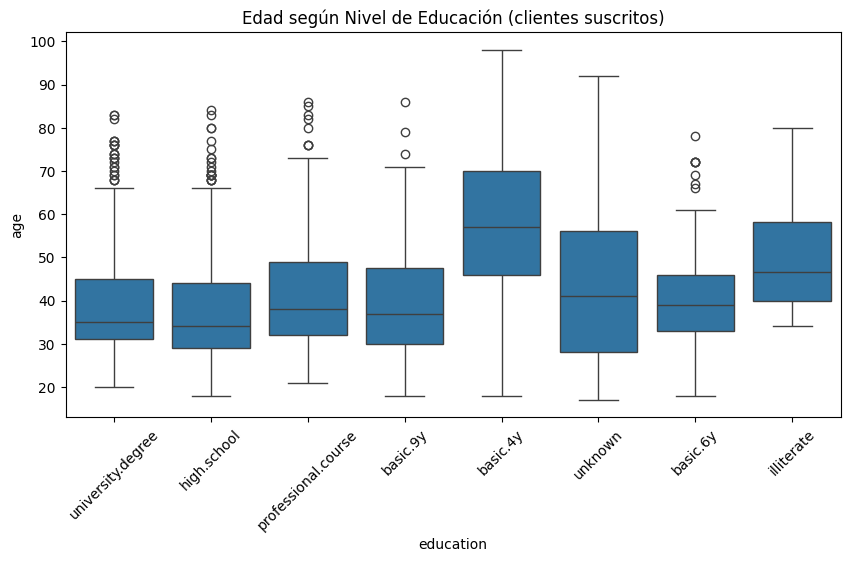

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_yes, x='education', y='age', order=data_yes['education'].value_counts().index)
plt.title('Edad según Nivel de Educación (clientes suscritos)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
summary = {}

for var in categorical_vars:
    summary[var] = data_yes[var].value_counts(normalize=True).round(3) * 100
print("El porcentaje de cada categoría en el conjunto de datos con variable objetivo de clase yes")
print(summary)

El porcentaje de cada categoría en el conjunto de datos con variable objetivo de clase yes
{'job': job
admin.           29.4
technician       15.4
blue-collar      13.9
retired           9.2
management        7.0
services          7.0
student           5.9
self-employed     3.2
unemployed        3.1
entrepreneur      2.8
housemaid         2.3
unknown           0.7
Name: proportion, dtype: float64, 'marital': marital
married     54.4
single      35.1
divorced    10.3
unknown      0.3
Name: proportion, dtype: float64, 'education': education
university.degree      36.2
high.school            22.2
professional.course    12.6
basic.9y               10.2
basic.4y                9.3
unknown                 5.1
basic.6y                4.1
illiterate              0.1
Name: proportion, dtype: float64, 'default': default
no         89.9
unknown    10.1
Name: proportion, dtype: float64, 'housing': housing
yes        54.1
no         43.7
unknown     2.1
Name: proportion, dtype: float64, 'loan': loa

In [ ]:
for col in categorical_vars:
    print(f'\nVariable: {col}')
    display(
        data.groupby(col)['y'].value_counts(normalize=True).unstack().fillna(0).sort_values('yes', ascending=False)
    )


Variable: job


y,no,yes
job,,
student,0.668937,0.331063
retired,0.748507,0.251493
unemployed,0.862405,0.137595
admin.,0.871105,0.128895
management,0.889060,0.110940
self-employed,0.895931,0.104069
technician,0.897219,0.102781
housemaid,0.902932,0.097068
unknown,0.907348,0.092652



Variable: marital


y,no,yes
marital,,
unknown,0.835821,0.164179
single,0.859799,0.140201
divorced,0.897623,0.102377
married,0.901185,0.098815



Variable: education


y,no,yes
education,,
illiterate,0.764706,0.235294
university.degree,0.864279,0.135721
unknown,0.864657,0.135343
professional.course,0.890943,0.109057
high.school,0.891629,0.108371
basic.4y,0.900417,0.099583
basic.6y,0.918151,0.081849
basic.9y,0.922765,0.077235



Variable: default


y,no,yes
default,,
no,0.872542,0.127458
unknown,0.948924,0.051076
yes,1.000000,0.000000



Variable: housing


y,no,yes
housing,,
yes,0.884713,0.115287
no,0.893740,0.106260
unknown,0.900565,0.099435



Variable: loan


y,no,yes
loan,,
no,0.888802,0.111198
yes,0.889620,0.110380
unknown,0.900565,0.099435



Variable: contact


y,no,yes
contact,,
cellular,0.849937,0.150063
telephone,0.948624,0.051376



Variable: month


y,no,yes
month,,
dec,0.465278,0.534722
mar,0.468271,0.531729
sep,0.502242,0.497758
oct,0.535902,0.464098
apr,0.765209,0.234791
nov,0.891086,0.108914
aug,0.900252,0.099748
jun,0.900717,0.099283
jul,0.914071,0.085929



Variable: day_of_week


y,no,yes
day_of_week,,
thu,0.879255,0.120745
wed,0.884992,0.115008
tue,0.885425,0.114575
fri,0.893510,0.106490
mon,0.903049,0.096951



Variable: poutcome


y,no,yes
poutcome,,
success,0.348871,0.651129
failure,0.485915,0.514085
nonexistent,0.911678,0.088322


# Conclusiones

* duration y previous tienen alta correlación positiva con la suscripción (y="yes"). Los clientes que permanecen más tiempo en la llamada y que han sido contactados anteriormente son más propensos a suscribirse.

* pdays, euribor3m, emp.var.rate y nr.employed tienen correlación negativa con la suscripción. Esto puede suponer que, cuando el índice económico es bajo (euribor, empleados), aumenta la probabilidad de suscripción.

* Por tipo de trabajo, los estudiantes y retirados tienen mayor proporción de respuesta positiva (> 25% y > 33% respectivamente), mientras que blue-collar y servicios muestran menor proporción.

* Por estado civil, los clientes solteros responden mejor que casados o divorciados.

* Por tipo de educación, los que tienen un título de grado universitario son más propensos a suscribirse.

* Por tipo de contacto, las llamadas por celular tienen mayor éxito que por teléfono. De todas formas, esto no es significativo, ya que el cambio de teléfono fijo a teléfono móvil se ha vuelto más frecuente; por lo que es entendible la poca cantidad de clientes que aceptan la suscripción de depósito por teléfono fijo.

* Por month, los meses deciembre, marzo, septiembre, octubre tienen porcentajes mucho más altos de aceptación que meses como mayo o junio. Esto tampoco es significativo, debido a que llamar en un mes específco no afecta en nada la probabilidad de que un cliente se suscriba (a menos que haya alguna especie de beneficio por parte del banco el suscribirse en mese finales del año).

* Por resultado previo de la campaña, los clientes que anteriormente habían tenido éxito tienen una probabilidad de suscribirse nuevamente del 65%, muy superior al promedio. Esto puede ayudar a saber que los clientes pueden seguir pagando el servicio, pero no demuestra que pueda ayudar a encontrar nuevos clientes.